# Borrador Análisis exploratorio e datos

**Enunciado**

*La idea de esta sección es que exploren el dataset y obtengan una idea de como son los datos de su problema para que en la siguientes secciones, puedan modelarlos.*

- [x] Analizar cantidad de datos nulos, tipos de datos, duplicados
- [ ] Distribuciones de las variables a través de histogramas.
- [ ] Generar visualizaciones de las interacciones (como por ejemplo, una scatter matrix) en las distintas variables.
- [ ] Ver las correlaciones entre las distintas variables y los valores faltantes de cada una de estas. 
- [ ] Proyectar los datos con PCA, T-SNE o UMAP para ver si existen relaciones entre las distintas variables de forma bi o tri dimensional.
- [ ] Reportar los patrones y relaciones interesantes.
- [ ] MÁS (No restringirse a lo mencionado anteriormente).

**Ejemplo enunciado**

Al efectuar el análisis exploratorio de datos pudimos notar lo siguiente:

El atributo A tenía X datos nulos y Y duplicados... que podrían potencialmente dificultar el análisis.

La variable A se distribuye de forma normal. En cambio la B en forma exponencial. La variable C es categórica.

Los atributos A y B interactúan de P forma, mientras que los C y D de Q forma...

Los atributos A y C se correlacionan con las variables de salida Y de forma creciente... B no tiene correlación con la salida.

Además, encontramos que al proyectar en 2D ...

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_pickle('train.pickle')
df_train.head()

,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,tags,achievements,average_playtime,price,short_description,estimated_sells,rating
0,An Aspie Life,2018-03-29,1,Bradley Hennessey;Joe Watson,EnderLost Studios,windows,0,Single-player;Steam Achievements,Adventure;Casual;Free to Play;Indie;Simulation,Free to Play;Adventure;Indie,23,0,0.00,One day your roommate Leaves for no reason. Yo...,3914,Mixed
1,GhostControl Inc.,2014-06-06,1,bumblebee,Application Systems Heidelberg,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Casual;Indie;Simulation;Strategy,Turn-Based;Indie;Simulation,53,65,10.99,Manage a team of ghosthunters and free London ...,10728,Mixed
2,Deponia,2012-08-06,1,Daedalic Entertainment,Daedalic Entertainment,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Adventure;Indie,Adventure;Point & Click;Comedy,19,217,6.99,"In Deponia, the world has degenerated into a v...",635792,Positive
3,Atlas Reactor,2016-10-04,1,Trion Worlds,Trion Worlds,windows,0,Multi-player;Online Multi-Player;Steam Achieve...,Free to Play;Strategy,Free to Play;Multiplayer;Strategy,121,1240,0.00,SEASON 6 NOW LIVE! The battle for Atlas contin...,253864,Positive
4,CHUCHEL,2018-03-07,1,Amanita Design,Amanita Design,windows;mac,0,Single-player;Steam Achievements;Steam Trading...,Adventure;Casual;Indie,Adventure;Indie;Casual,7,245,7.99,CHUCHEL is a comedy adventure game from the cr...,49818,Mostly Positive


## Análisis Básico

In [3]:
def exploratory_data_analysis(dataframe):
    print(f'El DataFrame tiene {dataframe.shape[0]} filas y {dataframe.shape[1]} columnas')
    print(f'El DataFrame esta compuesto por las siguientes columnas: {dataframe.columns.to_list()}')
    # print(f'\n3.- Ejemplos de filas del DataFrame:')
    print('Descripción numérica del DataFrame:')
    display(dataframe.describe())
    print('Cantidad de valores nulos por columna:')
    display(dataframe.isna().sum())
    print('Cantidad de valores únicos por columna:')
    display(dataframe.nunique())

exploratory_data_analysis(df_train)

El DataFrame tiene 7881 filas y 16 columnas
El DataFrame esta compuesto por las siguientes columnas: ['name', 'release_date', 'english', 'developer', 'publisher', 'platforms', 'required_age', 'categories', 'genres', 'tags', 'achievements', 'average_playtime', 'price', 'short_description', 'estimated_sells', 'rating']
Descripción numérica del DataFrame:


,english,required_age,achievements,average_playtime,price,estimated_sells
count,7881.000000,7881.00000,7881.000000,7881.000000,7881.000000,7.881000e+03
mean,0.985789,0.78924,43.170156,439.296790,8.431342,2.105767e+05
std,0.118369,3.55538,265.399206,3303.162083,8.755668,1.513926e+06
min,0.000000,0.00000,0.000000,0.000000,0.000000,3.600000e+03
25%,1.000000,0.00000,0.000000,0.000000,1.990000,9.724000e+03
50%,1.000000,0.00000,15.000000,27.000000,6.990000,2.150800e+04
75%,1.000000,0.00000,35.000000,251.000000,11.390000,7.357300e+04
max,1.000000,18.00000,9821.000000,190625.000000,78.990000,7.944129e+07


Cantidad de valores nulos por columna:


name                 0
release_date         0
english              0
developer            0
publisher            0
platforms            0
required_age         0
categories           0
genres               0
tags                 0
achievements         0
average_playtime     0
price                0
short_description    0
estimated_sells      0
rating               0
dtype: int64

Cantidad de valores únicos por columna:


name                 7881
release_date         2251
english                 2
developer            5365
publisher            3992
platforms               5
required_age            6
categories           1933
genres                844
tags                 3981
achievements          280
average_playtime     1257
price                 162
short_description    7848
estimated_sells      4879
rating                  5
dtype: int64

### Columnas con varias categorías posibles

In [4]:
def categorias(df,columna,counts=True,return_df=True):
    separate = lambda string: np.array(string.split(';'),dtype=object)
    options = np.vectorize(separate)(df[columna])
    values, freqs = np.unique(np.concatenate(options),return_counts=counts)
    if not return_df:
        return values, freqs
    else:
        total = df_train.shape[0]

        dff = pd.DataFrame(index=values)
        dff['frecuencia'] = freqs
        dff['porcentaje'] = 100 * freqs / total
        return dff.sort_values('frecuencia',ascending=False)

plataforms
largo = 3


,frecuencia,porcentaje
windows,7880,99.987311
mac,3125,39.652328
linux,2173,27.572643


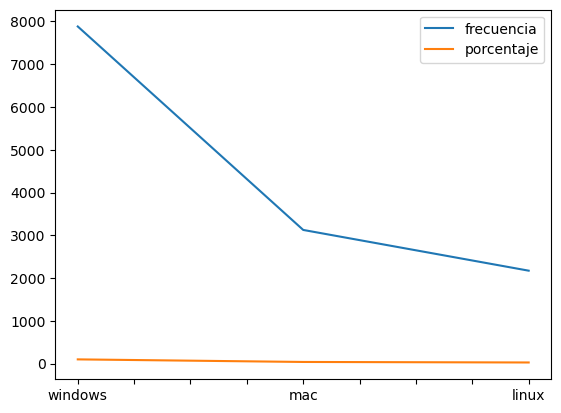

In [5]:
print("plataforms")
df_freq = categorias(df_train,'platforms')
print('largo = {}'.format(len(df_freq)))
df_freq.plot()
df_freq.head()

categories
largo = 29


,frecuencia,porcentaje
Single-player,7310,92.754727
Steam Achievements,5061,64.217739
Steam Trading Cards,4140,52.531405
Steam Cloud,3164,40.147189
Full controller support,2150,27.280802


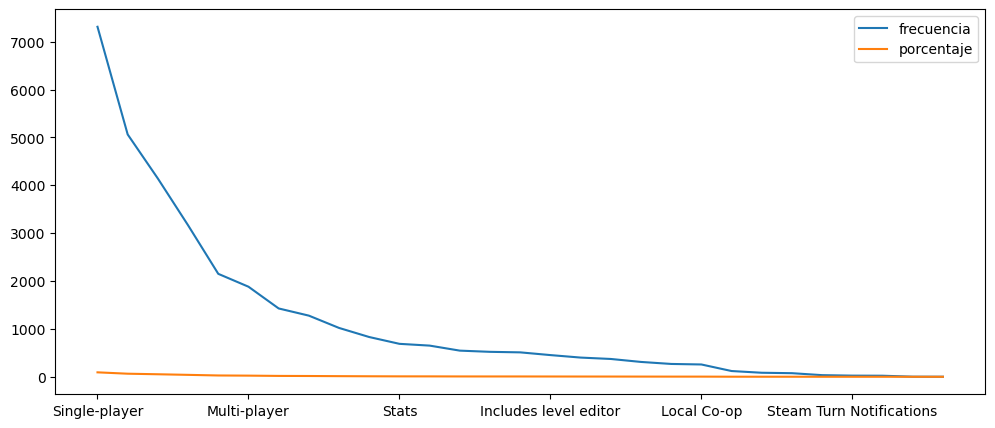

In [7]:
print('categories')
df_freq = categorias(df_train,'categories')
print('largo = {}'.format(len(df_freq)))
df_freq.plot(figsize=(12,5))
df_freq.head()

genres
largo = 26


,frecuencia,porcentaje
Indie,5112,64.864865
Action,3629,46.047456
Adventure,2977,37.774394
Casual,1977,25.085649
Strategy,1740,22.078416


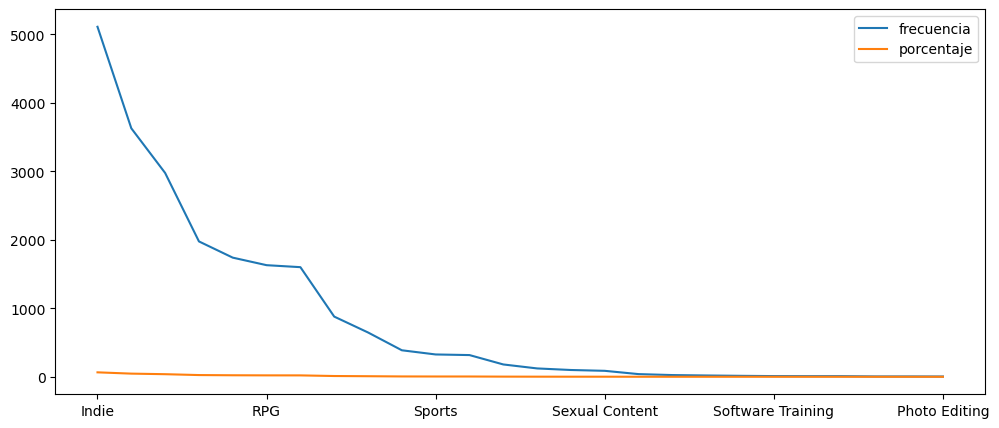

In [8]:
print('genres')
df_freq = categorias(df_train,'genres')
print('largo = {}'.format(len(df_freq)))
df_freq.plot(figsize=(12,5))
df_freq.head()

tags
largo = 306


,frecuencia,porcentaje
Indie,3489,44.271032
Action,2590,32.863850
Adventure,1826,23.169649
Strategy,1279,16.228905
Casual,1265,16.051263


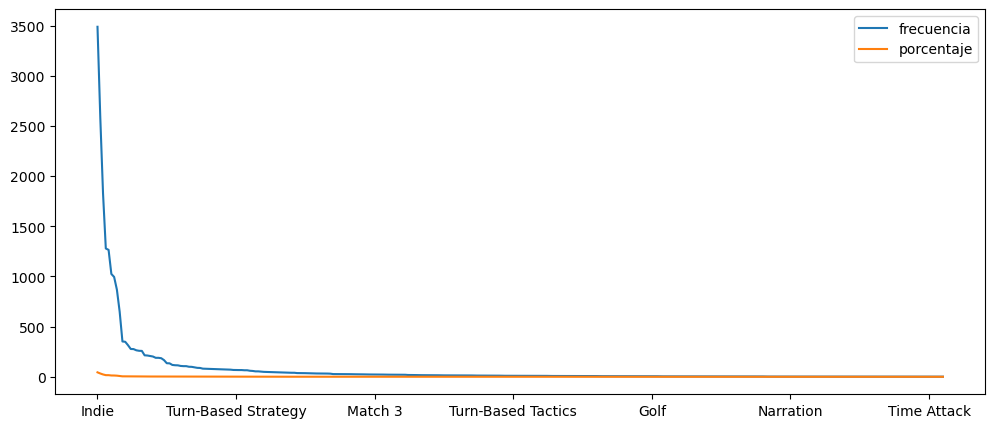

In [9]:
print('tags')
df_freq = categorias(df_train,'tags')
print('largo = {}'.format(len(df_freq)))
df_freq.plot(figsize=(12,5))
df_freq.head()

developer
largo = 5617


,frecuencia,porcentaje
Feral Interactive (Mac),40,0.507550
"KOEI TECMO GAMES CO., LTD.",35,0.444106
Square Enix,27,0.342596
Valve,23,0.291841
Ubisoft Montreal,22,0.279152


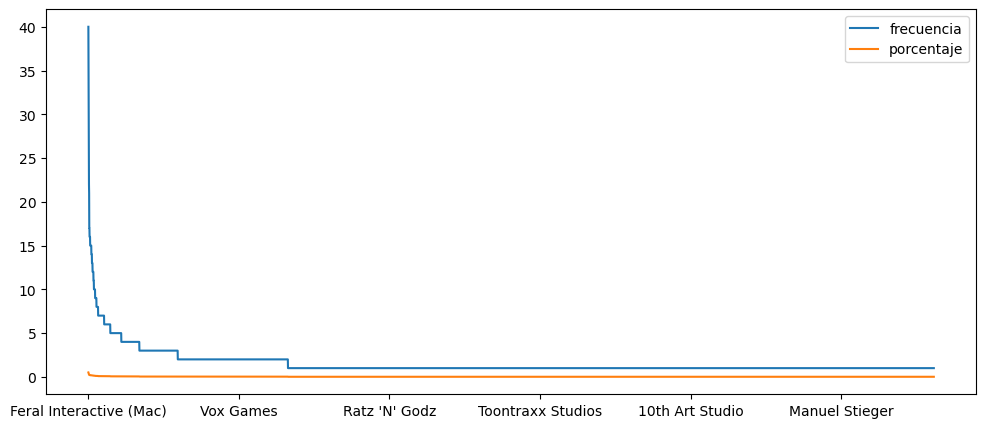

In [10]:
print('developer')
df_freq = categorias(df_train,'developer')
print('largo = {}'.format(len(df_freq)))
df_freq.plot(figsize=(12,5))
df_freq.head()

publisher
largo = 3961


,frecuencia,porcentaje
Ubisoft,95,1.205431
Square Enix,90,1.141987
THQ Nordic,85,1.078543
SEGA,74,0.938967
Devolver Digital,66,0.837457


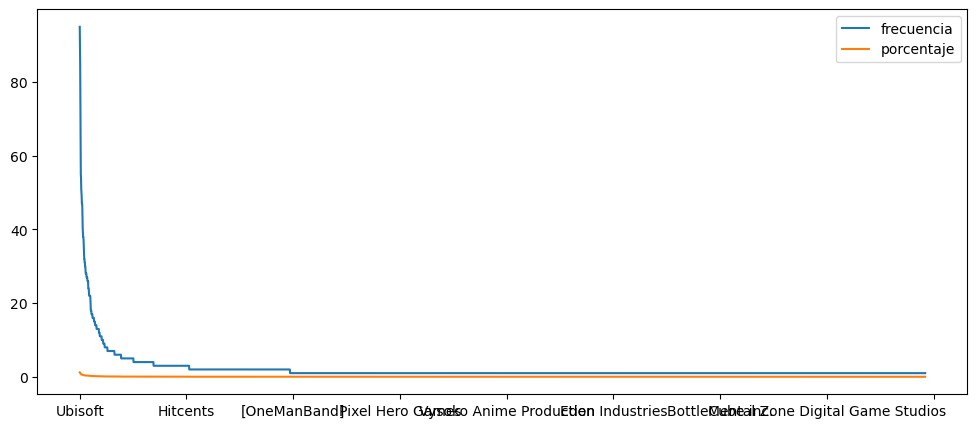

In [11]:
print('publisher')
df_freq = categorias(df_train,'publisher')
print('largo = {}'.format(len(df_freq)))
df_freq.plot(figsize=(12,5))
df_freq.head()

In [8]:
######################
class CategoriesTokenizer:
    def __init__(self):
        pass
        # self.ps = PorterStemmer()
    def __call__(self, doc):
        return doc.split(';')

In [9]:
tokenizador = CategoriesTokenizer()

docs = ['Adventure;Casual;Free to Play;Indie;Simulation',
        'Free to Play;Adventure;Indie',
        'windows;mac;linux',
        'Casual;Indie;Simulation;Strategy']

# Obtenemos el token del primer documento
[tokenizador(doc) for doc in docs]

[['Adventure', 'Casual', 'Free to Play', 'Indie', 'Simulation'],
 ['Free to Play', 'Adventure', 'Indie'],
 ['windows', 'mac', 'linux'],
 ['Casual', 'Indie', 'Simulation', 'Strategy']]

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

bow = CountVectorizer(tokenizer= CategoriesTokenizer())
df = bow.fit_transform(docs)

pd.DataFrame(df.toarray(), columns=bow.get_feature_names_out())

,adventure,casual,free to play,indie,linux,mac,simulation,strategy,windows
0,1,1,1,1,0,0,1,0,0
1,1,0,1,1,0,0,0,0,0
2,0,0,0,0,1,1,0,0,1
3,0,1,0,1,0,0,1,1,0


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

bog = CountVectorizer(
    tokenizer = CategoriesTokenizer(),
    min_df = 0.1  # hiperparametro a optimizar
    )

preprocessing = ColumnTransformer(
    transformers=[
        ('bag-of-categories',bog,['platforms','categories','genres','tags']),
        ('minmax',MinMaxScaler(),['...'])
    ]
)

## Exploración de variable de texto

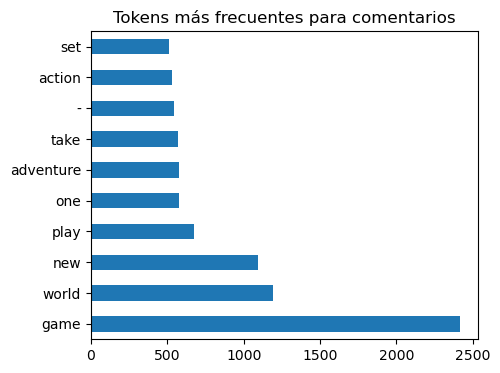

In [11]:
from exploracion_texto import plot_token_frequency, most_common
from nltk.corpus import stopwords

serie_tokens = most_common(df_train,'short_description',ignore=stopwords.words('english'))
plot_token_frequency(serie_tokens,'Tokens más frecuentes para comentarios')

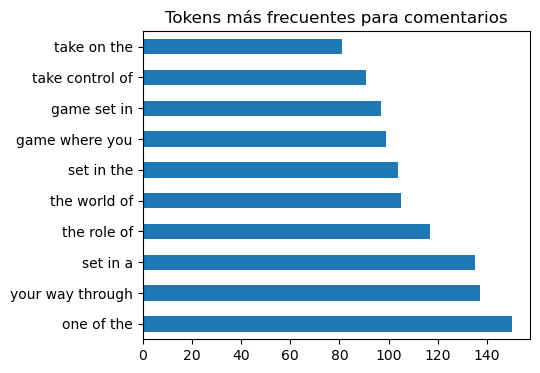

In [13]:
serie_tokens3 = most_common(df_train,'short_description',n_grams=3)
plot_token_frequency(serie_tokens3,'Tokens más frecuentes para comentarios')

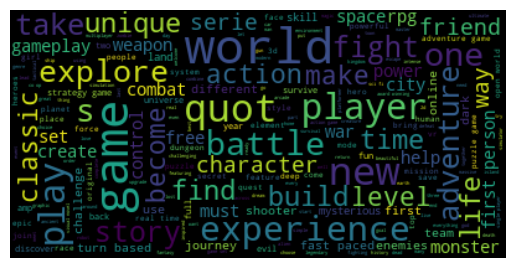

In [14]:
from exploracion_texto import wordcloud_from_column

wordcloud_from_column(df_train,'short_description',ignore=stopwords.words('english'))